# Machine Learning Project

This project is using K-Means algorithm to determine what property is most ideal. 
It uses Rolling Sales data from Nov. 2018 to Oct. 2019 as provided by New York City Open Data.

In [1]:
#install all relevant packages

import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.cluster import KMeans
import xlrd
import matplotlib.pyplot as plt
import copy
%matplotlib inline 

In [2]:
#take the data of the 5 excel files that I have
dfM = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_manhattan.xls')
dfX = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_bronx.xls')
dfK = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_brooklyn.xls')
dfQ = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_queens.xls')
dfR = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_statenisland.xls')

In [3]:
#combine the datasets and create a new one called df2019
df2019 = pd.concat([dfM, dfX, dfK, dfQ, dfR],sort=False)
df2019.reset_index(drop=True)
df2019

BOROUGH     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0           1     01 ONE FAMILY DWELLINGS                    1   
1           1     01 ONE FAMILY DWELLINGS                    1   
2           1     01 ONE FAMILY DWELLINGS                    1   
3           1     02 TWO FAMILY DWELLINGS                    1   
4           1     02 TWO FAMILY DWELLINGS                    1   
...       ...                         ...                  ...   
7563        5     02 TWO FAMILY DWELLINGS                    1   
7564        5  05 TAX CLASS 1 VACANT LAND                    1   
7565        5  05 TAX CLASS 1 VACANT LAND                    1   
7566        5      06 TAX CLASS 1 - OTHER                    1   
7567        5  05 TAX CLASS 1 VACANT LAND                   1B   

      RESIDENTIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                     1            2              2090               3680   
1                     1            1               987               2183   
2                     1            1              1883               5200   
3                     2            2              1510               4520   
4                     2            2              1510               4520   
...                 ...          ...               ...                ...   
7563                  2            2              8846               1710   
7564                  0            0              6979                  0   
7565                  0            0              5016                  0   
7566                  0            0              7920                  0   
7567                  0            0              2640                  0   

      YEAR BUILT  TAX CLASS AT TIME OF SALE  SALE PRICE  \
0         1940.0                          1     3200000   
1         1860.0                          1           0   
2         1900.0                          1     6100000   
3         1900.0                          1           0   
4         1900.0                          1           0   
...          ...                        ...         ...   
7563      2001.0                          1      637500   
7564      2018.0                          1      599701   
7565      2018.0                          1      896060   
7566      2011.0                          1           0   
7567         0.0                          1       26000   

     BUILDING CLASS AT PRESENT BUILDING CLASS AT TIME OF SALE  
0                          NaN                            NaN  
1                          NaN                            NaN  
2                          NaN                            NaN  
3                          NaN                            NaN  
4                          NaN                            NaN  
...                        ...                            ...  
7563                       NaN                            NaN  
7564                       NaN                            NaN  
7565                       NaN                            NaN  
7566                       NaN                            NaN  
7567                       NaN                            NaN  

[81655 rows x 12 columns]

In [4]:
df2019.drop(df2019.columns[[2,5,8,10,11]], axis=1, inplace=True)
#removed columns: Tax Classes, Building Class at Present & Time of Sale, Land Square Feet
df2019

BOROUGH     BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  TOTAL UNITS  \
0           1     01 ONE FAMILY DWELLINGS                  1            2   
1           1     01 ONE FAMILY DWELLINGS                  1            1   
2           1     01 ONE FAMILY DWELLINGS                  1            1   
3           1     02 TWO FAMILY DWELLINGS                  2            2   
4           1     02 TWO FAMILY DWELLINGS                  2            2   
...       ...                         ...                ...          ...   
7563        5     02 TWO FAMILY DWELLINGS                  2            2   
7564        5  05 TAX CLASS 1 VACANT LAND                  0            0   
7565        5  05 TAX CLASS 1 VACANT LAND                  0            0   
7566        5      06 TAX CLASS 1 - OTHER                  0            0   
7567        5  05 TAX CLASS 1 VACANT LAND                  0            0   

      GROSS SQUARE FEET  YEAR BUILT  SALE PRICE  
0                  3680      1940.0     3200000  
1                  2183      1860.0           0  
2                  5200      1900.0     6100000  
3                  4520      1900.0           0  
4                  4520      1900.0           0  
...                 ...         ...         ...  
7563               1710      2001.0      637500  
7564                  0      2018.0      599701  
7565                  0      2018.0      896060  
7566                  0      2011.0           0  
7567                  0         0.0       26000  

[81655 rows x 7 columns]

In [5]:
# We want the first two characters of the building class category
df2019['BUILDING CLASS CATEGORY'] = df2019['BUILDING CLASS CATEGORY'].astype(str).str[0:2]
#turn year to a int value
df2019['YEAR BUILT'] = df2019['YEAR BUILT'].astype(str).str[0:4]
df2019

BOROUGH BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  TOTAL UNITS  \
0           1                      01                  1            2   
1           1                      01                  1            1   
2           1                      01                  1            1   
3           1                      02                  2            2   
4           1                      02                  2            2   
...       ...                     ...                ...          ...   
7563        5                      02                  2            2   
7564        5                      05                  0            0   
7565        5                      05                  0            0   
7566        5                      06                  0            0   
7567        5                      05                  0            0   

      GROSS SQUARE FEET YEAR BUILT  SALE PRICE  
0                  3680       1940     3200000  
1                  2183       1860           0  
2                  5200       1900     6100000  
3                  4520       1900           0  
4                  4520       1900           0  
...                 ...        ...         ...  
7563               1710       2001      637500  
7564                  0       2018      599701  
7565                  0       2018      896060  
7566                  0       2011           0  
7567                  0        0.0       26000  

[81655 rows x 7 columns]

We are only looking for residential build class categories that are not Co-ops nor Rentals. These are the building class categories deemed acceptable. 

01: One Family Dwelling

02: Two Family Dwelling

03: Three Family Dwelling

04: Tax Class 1 Condos

12: Condos Walkup Apt

13: Condos Elevator Apt

15: Condos 2-10 Unit Residential

In [6]:
AcceptedBuildClass = ['01','02','03','04','12','13','15']
df2019 = df2019[df2019['BUILDING CLASS CATEGORY'].isin(AcceptedBuildClass)]
df2019

BOROUGH BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  TOTAL UNITS  \
0           1                      01                  1            2   
1           1                      01                  1            1   
2           1                      01                  1            1   
3           1                      02                  2            2   
4           1                      02                  2            2   
...       ...                     ...                ...          ...   
7559        5                      02                  2            2   
7560        5                      02                  2            2   
7561        5                      02                  2            2   
7562        5                      02                  2            2   
7563        5                      02                  2            2   

      GROSS SQUARE FEET YEAR BUILT  SALE PRICE  
0                  3680       1940     3200000  
1                  2183       1860           0  
2                  5200       1900     6100000  
3                  4520       1900           0  
4                  4520       1900           0  
...                 ...        ...         ...  
7559               2400       2000      917000  
7560               1920       2000           0  
7561               2160       2001      610000  
7562               2565       2001      625000  
7563               1710       2001      637500  

[55001 rows x 7 columns]

# Comparing Gross Square Feet and Sales Price

## Data Analysis
We will look at the data to get rid of various outliers.

In [7]:
#sales prices shouldn't be zero
newdf2019 = df2019[df2019['SALE PRICE']>0]

newdf2019

BOROUGH BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  TOTAL UNITS  \
0           1                      01                  1            2   
2           1                      01                  1            1   
6           1                      03                  3            3   
79          1                      13                  0            0   
80          1                      13                  0            0   
...       ...                     ...                ...          ...   
7558        5                      02                  2            2   
7559        5                      02                  2            2   
7561        5                      02                  2            2   
7562        5                      02                  2            2   
7563        5                      02                  2            2   

      GROSS SQUARE FEET YEAR BUILT  SALE PRICE  
0                  3680       1940     3200000  
2                  5200       1900     6100000  
6                  3600       1899     6300000  
79                  588       1920      810000  
80                  605       1920      847000  
...                 ...        ...         ...  
7558               2377       1998      640000  
7559               2400       2000      917000  
7561               2160       2001      610000  
7562               2565       2001      625000  
7563               1710       2001      637500  

[37160 rows x 7 columns]

In [8]:
# Get rid of outliers.
lower_range = 0
upper_range = 0
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print("IQR:",IQR)
    print("Q1:",Q1)
    print("Upper Range:",upper_range)
    print("Q3:",Q3)
    print("Lower Range:",lower_range)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(newdf2019['SALE PRICE'])

IQR: 633333.0
Q1: 500000.0
Upper Range: 2083332.5
Q3: 1133333.0
Lower Range: -449999.5


In [9]:
newdf2019 = newdf2019[newdf2019['SALE PRICE'] < 2083332.5]
#since Lower Range is negative, no need to filter because we already know that there's no sales price under 0.
newdf2019

BOROUGH BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  TOTAL UNITS  \
79          1                      13                  0            0   
80          1                      13                  0            0   
81          1                      13                  0            0   
82          1                      13                  0            0   
90          1                      13                  0            0   
...       ...                     ...                ...          ...   
7558        5                      02                  2            2   
7559        5                      02                  2            2   
7561        5                      02                  2            2   
7562        5                      02                  2            2   
7563        5                      02                  2            2   

      GROSS SQUARE FEET YEAR BUILT  SALE PRICE  
79                  588       1920      810000  
80                  605       1920      847000  
81                  955        0.0     1095000  
82                  495       2014      710000  
90                  931       2005     1062500  
...                 ...        ...         ...  
7558               2377       1998      640000  
7559               2400       2000      917000  
7561               2160       2001      610000  
7562               2565       2001      625000  
7563               1710       2001      637500  

[33346 rows x 7 columns]

In [10]:
# Get rid of outliers.
lower_range = 0
upper_range = 0

lowerbound,upperbound = outlier_treatment(newdf2019['GROSS SQUARE FEET'])

IQR: 1019.0
Q1: 991.0
Upper Range: 3538.5
Q3: 2010.0
Lower Range: -537.5


In [11]:
newdf2019 = newdf2019[newdf2019['GROSS SQUARE FEET'] < 3538.5]
#since Lower Range is negative and we cannot have negative square feet, we do not to filter it. 
newdf2019

BOROUGH BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  TOTAL UNITS  \
79          1                      13                  0            0   
80          1                      13                  0            0   
81          1                      13                  0            0   
82          1                      13                  0            0   
90          1                      13                  0            0   
...       ...                     ...                ...          ...   
7558        5                      02                  2            2   
7559        5                      02                  2            2   
7561        5                      02                  2            2   
7562        5                      02                  2            2   
7563        5                      02                  2            2   

      GROSS SQUARE FEET YEAR BUILT  SALE PRICE  
79                  588       1920      810000  
80                  605       1920      847000  
81                  955        0.0     1095000  
82                  495       2014      710000  
90                  931       2005     1062500  
...                 ...        ...         ...  
7558               2377       1998      640000  
7559               2400       2000      917000  
7561               2160       2001      610000  
7562               2565       2001      625000  
7563               1710       2001      637500  

[32603 rows x 7 columns]

In [12]:
df = newdf2019.copy()
df.drop(df.columns[[0,1,2,3,5]], axis=1, inplace=True)
df

GROSS SQUARE FEET  SALE PRICE
79                  588      810000
80                  605      847000
81                  955     1095000
82                  495      710000
90                  931     1062500
...                 ...         ...
7558               2377      640000
7559               2400      917000
7561               2160      610000
7562               2565      625000
7563               1710      637500

[32603 rows x 2 columns]

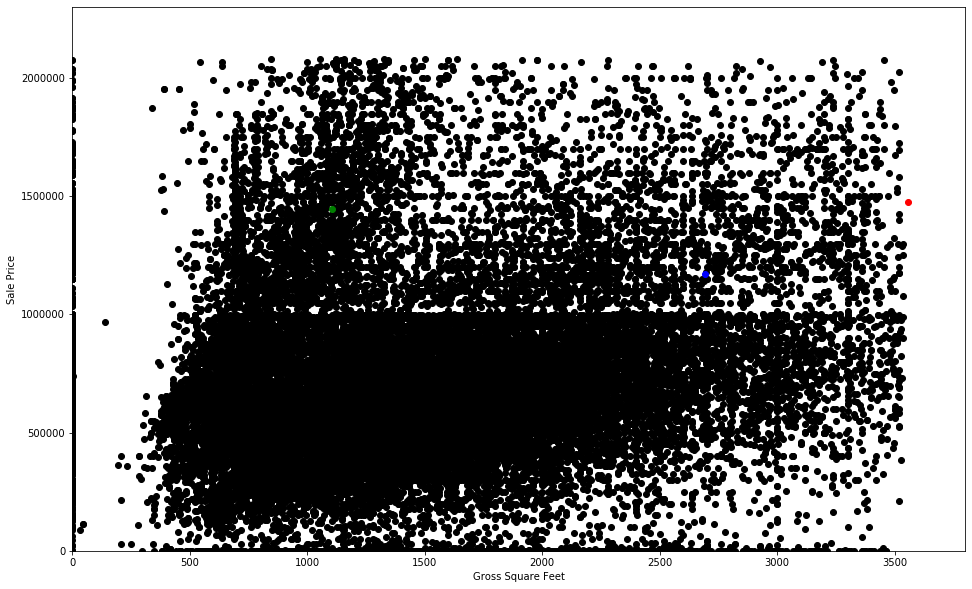

In [13]:
np.random.seed(16000)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 3800), np.random.randint(0, 2300000)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(16, 10))
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 3800)
plt.ylim(0, 2300000)
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()

This data cannot be properly observed due to the various outliers. We will cap the sale price of the place at 40000000. 

## K-Means

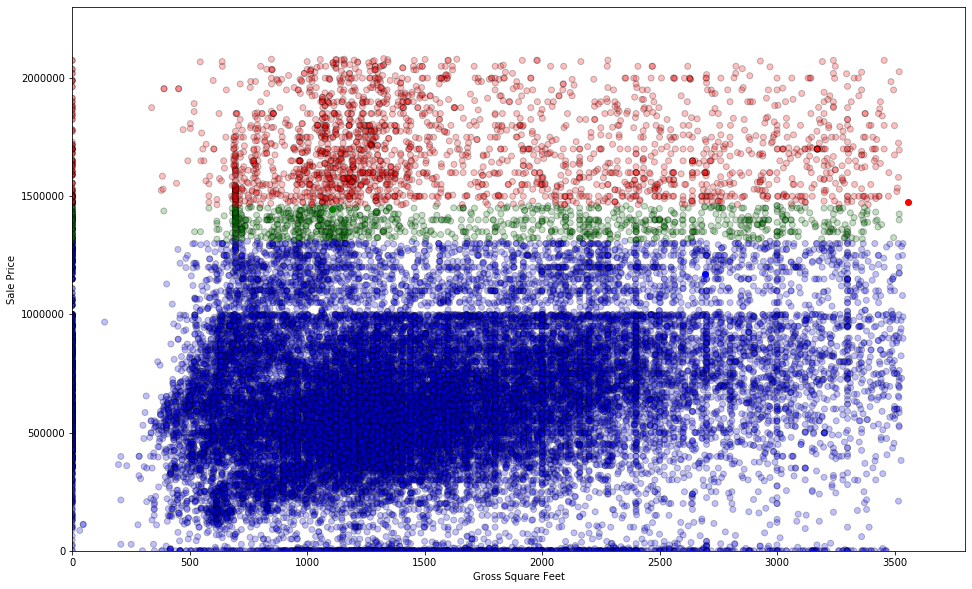

In [14]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2) distance formula
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['GROSS SQUARE FEET'] - centroids[i][0]) ** 2
                + (df['SALE PRICE'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
#print(df.head())

fig = plt.figure(figsize=(16, 10))
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color=df['color'], alpha=0.25, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 3800)
plt.ylim(0, 2300000)
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()

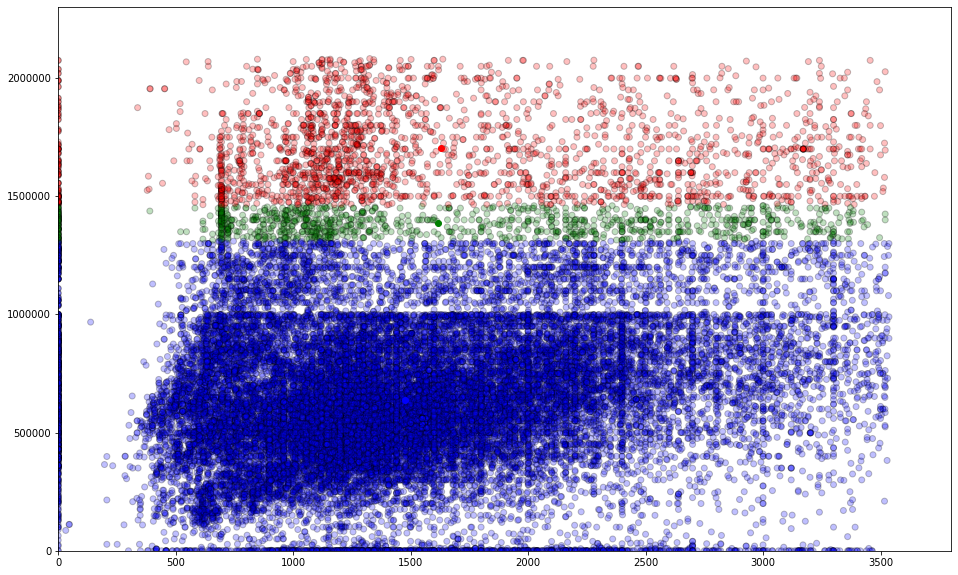

In [15]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['GROSS SQUARE FEET'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['SALE PRICE'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color=df['color'], alpha=0.25, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 3800)
plt.ylim(0, 2300000)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    #ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

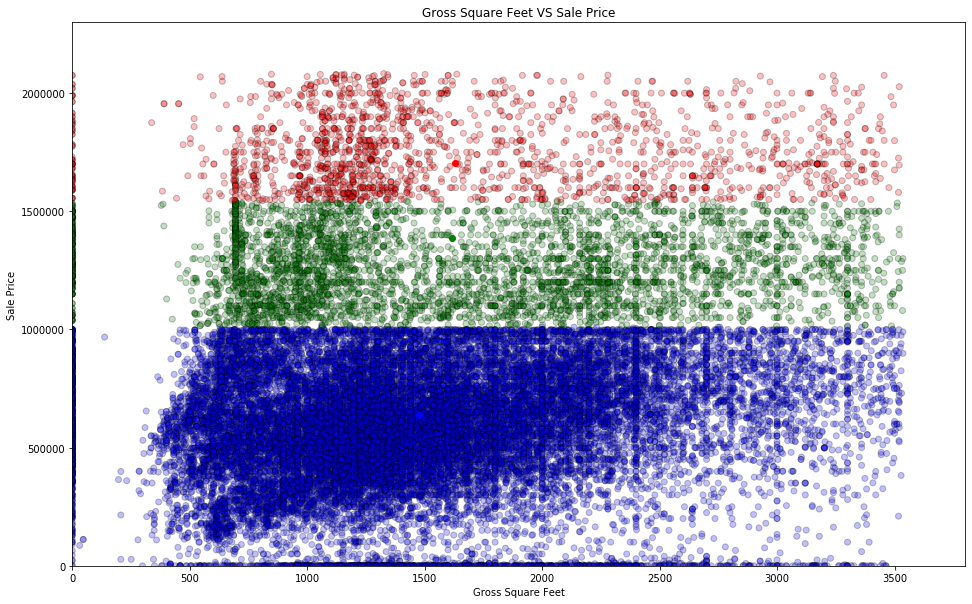

In [16]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(16, 10))
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color=df['color'], alpha=0.25, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 3800)
plt.ylim(0, 2300000)
plt.title('Gross Square Feet VS Sale Price')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()

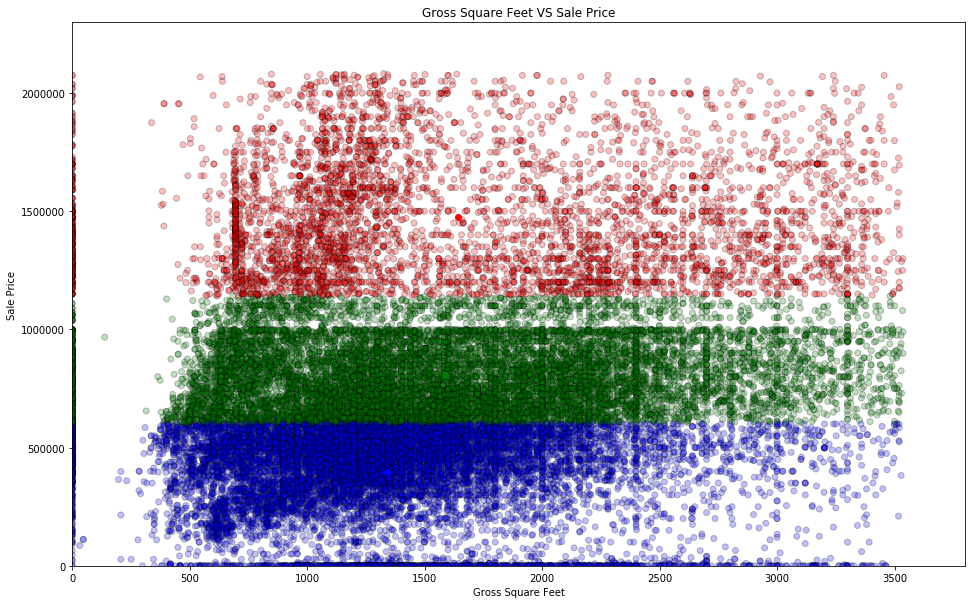

In [17]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(16, 10))
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color=df['color'], alpha=0.25, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 3800)
plt.ylim(0, 2300000)
plt.title('Gross Square Feet VS Sale Price')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()

In [18]:
comp_df = newdf2019.copy()
comp_df.drop(comp_df.columns[[0,1,2,3,5]], axis=1, inplace=True)
kmeans = KMeans(n_clusters=3)
kmeans.fit(comp_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[  1582.2242484  799201.25698798]
[   1640.13529754 1473518.27369638]
[  1337.68235028 387680.64390901]


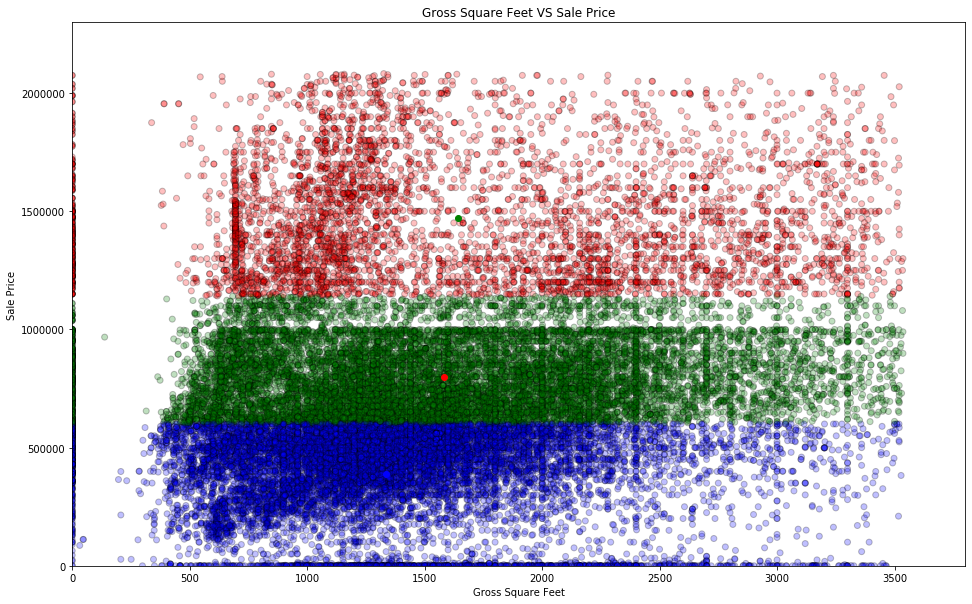

In [19]:
labels = kmeans.predict(comp_df)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(16, 10))

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(comp_df['GROSS SQUARE FEET'], comp_df['SALE PRICE'], color=df['color'], alpha=0.25, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
    print(centroid)     # prints the cluster centers
plt.xlim(0, 3800)
plt.ylim(0, 2300000)
plt.title('Gross Square Feet VS Sale Price')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.show()


# Year Built VS Sales Price

## Analysis

In [20]:
# Get rid of outliers.
lower_range = 0
upper_range = 0
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print("IQR:",IQR)
    print("Q1:",Q1)
    print("Upper Range:",upper_range)
    print("Q3:",Q3)
    print("Lower Range:",lower_range)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(newdf2019['SALE PRICE'])


IQR: 455000.0
Q1: 475000.0
Upper Range: 1612500.0
Q3: 930000.0
Lower Range: -207500.0


In [21]:
lowerbound,upperbound = outlier_treatment(newdf2019['YEAR BUILT'])

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:

newdf2019 = newdf2019[newdf2019['YEAR BUILT'] < 3454.5]
newdf2019 = newdf2019[newdf2019['SALE PRICE'] < 1612500]
#since Lower Range is negative and we cannot have negative square feet, we do not to filter it. 
newdf2019

## K-Means

In [ ]:
df = newdf2019.copy()
df.drop(df.columns[[0,1,2,3,4]], axis=1, inplace=True)

In [ ]:
np.random.seed(16000)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(1000, 2050), np.random.randint(0, 2300000)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(16, 10))
plt.scatter(df['YEAR BUILT'], df['SALE PRICE'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(1000, 2050)
plt.ylim(0, 2300000)
plt.xlabel('YEAR BUILT')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2) distance formula
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['YEAR BUILT'] - centroids[i][0]) ** 2
                + (df['SALE PRICE'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
#print(df.head())

fig = plt.figure(figsize=(16, 10))
plt.scatter(df['YEAR BUILT'], df['SALE PRICE'], color=df['color'], alpha=0.25, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 2050)
plt.ylim(0, 2300000)
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

# Borough VS Sales Price

In [ ]:
# Get rid of outliers.
lower_range = 0
upper_range = 0
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print("IQR:",IQR)
    print("Q1:",Q1)
    print("Upper Range:",upper_range)
    print("Q3:",Q3)
    print("Lower Range:",lower_range)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(newdf2019['SALE PRICE'])


In [ ]:
lowerbound,upperbound = outlier_treatment(newdf2019['YEAR BUILT'])